In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from hilbertcurve.hilbertcurve import HilbertCurve

### Constants

In [165]:
OFFSET = 10
FACTOR_MULTIPLY = 10000

### Read file

In [166]:
df = pd.read_csv('data/lane_changes/20Hz/lane_change_5.csv', sep=';')


In [167]:
# Reading other files for CSP analysis of different maneouvres
# Plotting braking_cut shows us that certain parts of the resulting CSP are the same as with the lane change.
#df = pd.read_csv('data/braking_cut.csv', sep=';')
#df = pd.read_csv('data/braking_and_lanechange.csv', sep=';')

### Apply constants

In [168]:
df['accel_lon']=df['accel_lon'].add(OFFSET)
df['accel_trans']=df['accel_trans'].add(OFFSET)
df['accel_down']=df['accel_down'].add(OFFSET)

df['accel_lon'] = df.apply(lambda x: int(x['accel_lon']*FACTOR_MULTIPLY) , axis=1)
df['accel_trans'] = df.apply(lambda x: int(x['accel_trans']*FACTOR_MULTIPLY) , axis=1)
df['accel_down'] = df.apply(lambda x: int(x['accel_down']*FACTOR_MULTIPLY) , axis=1)


### Hilbert indexing

In [169]:
resolution = 26; dimension = 3
hilbert_curve = HilbertCurve(resolution, dimension, n_procs=-1)

points = df[['accel_lon', 'accel_trans', 'accel_down']].to_numpy()

# Generate Hilbert index
distances = hilbert_curve.distances_from_points(points)

# Add Hilbert index to 'hilbert' column
df_hilbert = pd.concat([df, pd.DataFrame(distances, columns = ['hilbert'] )], axis=1)

### Hilbert Plots

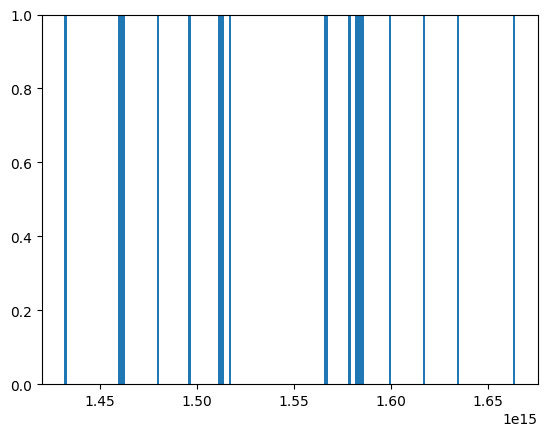

In [170]:
# 'bins' explained: https://www.metabase.com/glossary/bin

# What 'bins' value is best?
plt.hist(df_hilbert['hilbert'], bins=200)

# limit y axis to 1 to show binary presence of data point
plt.ylim(0,1)
# limit x axis to take only "lane change relevant" data
#plt.xlim(9000000000,13000000000)

plt.show()

### Scatter Plots

<Axes: xlabel='accel_lon', ylabel='accel_trans'>

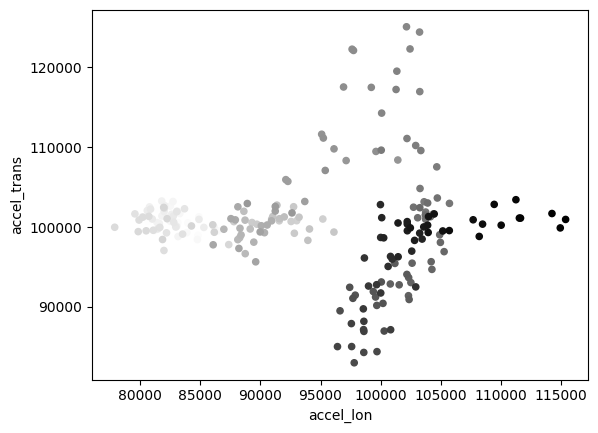

In [171]:
# 2D-plot with timestamp as color gradient
df.plot(kind='scatter',x='accel_lon',y='accel_trans',color=df['ts'])

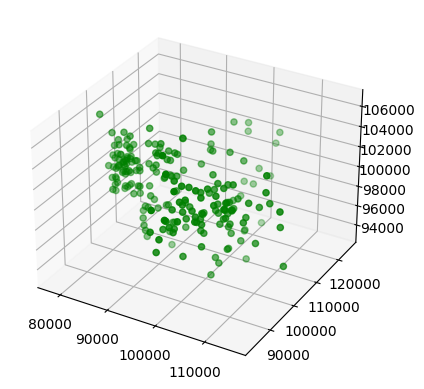

In [172]:
#creating 3D-Plot
ax = plt.axes(projection ="3d")
ax.scatter3D(df['accel_lon'],df['accel_trans'],df['accel_down'], color = "green")